# Intermediate Problems

## MyRange and LinSpace Problem

###### Part 1

Let's create our own implementation of the range type. The `Range` type is what you get from `1:2:20`. It's form is `start:step:stop`. If you know `start`, `step`, and `stop`, how do you calculate the `i`th value? Create a type `MyRange` which stores `start`, `step`, and `stop`. Can you create a function `_MyRange(a,i)` which for `a` being a `MyRange`, it returns what `a[i]` should be? After getting this correct, use the [Julia array interface](https://docs.julialang.org/en/stable/manual/interfaces/#Indexing-1) in order to define the function for the `a[i]` syntax on your type.

In [3]:
struct MyRange
    start
    step
    stop
end

function _MyRange(a::MyRange, i::Int)
    ans = a.start + (a.step)*(i-1)
    if ans > a.stop
        error("Index out of Range")
    else
        return ans
    end        
end

_MyRange (generic function with 1 method)

In [5]:
_MyRange(MyRange(2,5,20),4)

17

######  Part 2

A LinSpace object is a lazy representation of `N` values from `start` to `stop`. Use the Array interface to implement a lazy version of the LinSpace. Test against `range(start,stop=stop,length=N)`.

http://ucidatascienceinitiative.github.io/IntroToJulia/Html/ArrayIteratorInterfaces

(Note, Base's range type has extra accuracy enhancing changes. Just do the "simple" implementation")

In [9]:
struct Mylinspace
    start
    stop
    length
end

function _Mylinspace(a::Mylinspace, i::Int)
    diff = (a.stop - a.start)/a.length
    ans = a.start + (i-1)*diff
    return ans
end

_Mylinspace (generic function with 1 method)

In [10]:
@show _Mylinspace(Mylinspace(1,20,100), 30)
@show range(1,stop=20,length=100)[30];

_Mylinspace(Mylinspace(1, 20, 100), 30) = 6.51
(range(1, stop=20, length=100))[30] = 6.565656565656566


##### Part 3

Check out the call overloading notebook:

http://ucidatascienceinitiative.github.io/IntroToJulia/Html/CallOverloading

Overload the call on the UnitStepRange to give an interpolated value at intermediate points, i.e. if `a=1:2:10`, then `a(1.5)=2`.

In [14]:
(c::MyRange)(i::Float64) = (c.start + c.step * (i-1))

In [15]:
r = MyRange(1,2,10)
r(1.5)

2.0

## Regression Problem


```julia
#### Prepare Data For Regression Problem

X = rand(1000, 3)               # feature matrix
a0 = rand(3)                    # ground truths
y = X * a0 + 0.1 * randn(1000);  # generate response

# Data For Regression Problem Part 2
X = rand(100);
y = 2X  + 0.1 * randn(100);
```

Given an Nx3 array of data (`randn(N,3)`) and a Nx1 array of outcomes, produce the data matrix `X` which appends a column of 1's to the front of the data matrix, and solve for the 4x1 array `β` via `βX = b` using `qrfact`, or `\`, or [the definition of the OLS estimator](https://en.wikipedia.org/wiki/Ordinary_least_squares#Estimation). (Note: This is linear regression).

Compare your results to that of using `llsq` from `MultivariateStats.jl` (note: you need to go find the documentation to find out how to use this!). Compare your results to that of using ordinary least squares regression from `GLM.jl`.

In [17]:
#### Prepare Data For Regression Problem

X = rand(1000, 3)               # feature matrix
a0 = rand(3)                    # ground truths
y = X * a0 + 0.1 * randn(1000);  # generate response

In [31]:
_X = hcat(X,ones(1000))

β = _X\y
println("Actual:$a0 ")
println("Calculated: $(β[1:3])")


Actual:[0.357679, 0.863759, 0.510622] 
Calculated: [0.351879, 0.867535, 0.523324]


#### Regression Problem Part 2

Using your OLS estimator or one of the aforementioned packages, solve for the regression line using the (X,y) data above. Plot the (X,y) scatter plot using `scatter!` from Plots.jl. Add the regression line using `abline!`. Add a title saying "Regression Plot on Fake Data", and label the x and y axis.

In [32]:
# Data For Regression Problem Part 2
X = rand(100);
y = 2X  + 0.1 * randn(100);

β = X \ y = 2.0196208903196835


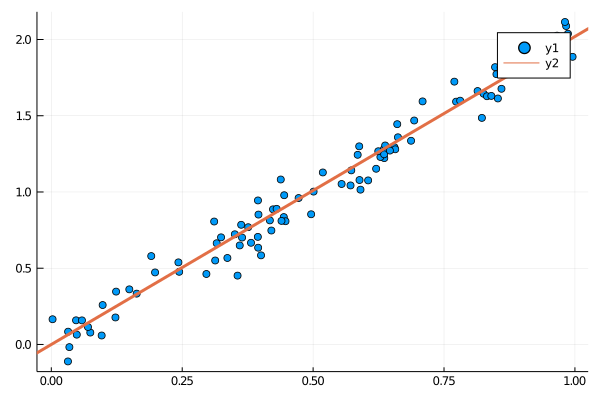

In [35]:
using Plots
@show β = X\y
scatter(X,y)
Plots.abline!(β[1],0.0, lw=3) 